In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
       "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
 len(dataset) 

68

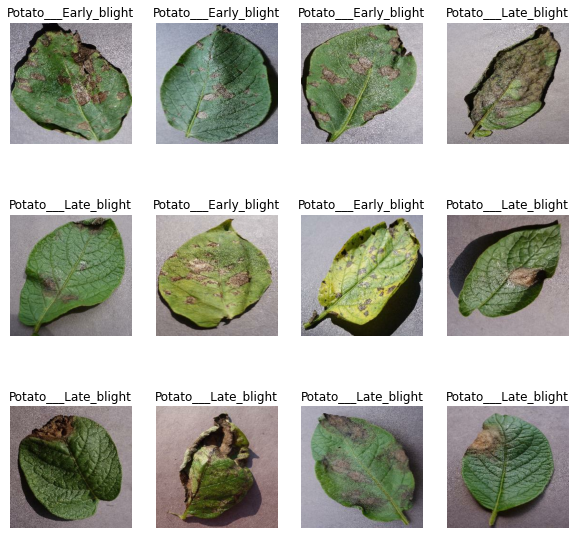

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
#%80 training, %10 validation %10 test

In [9]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_data=dataset.take(54)
len(train_data)

54

In [11]:
test_data=dataset.skip(54)
len(test_data)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_data=dataset.take(6)
len(val_data)

6

In [14]:
test_data=test_data.skip(6)
len(test_data)

8

# SPLITTING THE DATASET

In [15]:
def split_dataset(data,train=0.8,validation=0.1,test=0.1,shuffle=True,shuffle_size=10000):
    
    dataset_size=len(data)
    if shuffle:
        data=data.shuffle(shuffle_size,seed=12)
    
    
    train_size=int(train*dataset_size)
    
    validation_size=int(validation*dataset_size)
    
    train_data=data.take(train_size)
    val_data=data.skip(train_size).take(validation_size)
    test_data=data.skip(train_size).skip(validation_size)
    
    
    return train_data, val_data,test_data

In [16]:
train_data, val_data,test_data=split_dataset(dataset)

In [17]:
len(train_data)

54

In [18]:
len(test_data)

8

In [19]:
len(val_data)

6

In [20]:
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale=tf.keras.Sequential([
    
     layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
     layers.experimental.preprocessing.Rescaling(1.0/255)
    
    
])

In [22]:
data_augmentation=tf.keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

# BUILDING AND TRAINING THE CNN MODEL

In [23]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3


model = models.Sequential([
    
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape), #convolutional layer
    layers.MaxPooling2D((2,2)),#pooling layer
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
])

model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

In [26]:
history=model.fit(train_data,
         epochs=EPOCHS,
         batch_size=BATCH_SIZE,
         verbose=1,
         validation_data=val_data)

Epoch 1/50
54/54 [==============================] - 84s 1s/step - loss: 1.8688 - accuracy: 0.5347 - val_loss: 0.7743 - val_accuracy: 0.6302
Epoch 2/50
54/54 [==============================] - 70s 1s/step - loss: 0.5559 - accuracy: 0.7448 - val_loss: 0.3931 - val_accuracy: 0.8021
Epoch 3/50
54/54 [==============================] - 70s 1s/step - loss: 0.2785 - accuracy: 0.8866 - val_loss: 0.2451 - val_accuracy: 0.9167
Epoch 4/50
54/54 [==============================] - 70s 1s/step - loss: 0.3064 - accuracy: 0.8750 - val_loss: 0.5609 - val_accuracy: 0.7865
Epoch 5/50
54/54 [==============================] - 73s 1s/step - loss: 0.2116 - accuracy: 0.9248 - val_loss: 0.2574 - val_accuracy: 0.9010
Epoch 6/50
54/54 [==============================] - 71s 1s/step - loss: 0.2278 - accuracy: 0.9184 - val_loss: 0.1721 - val_accuracy: 0.9323
Epoch 7/50
54/54 [==============================] - 70s 1s/step - loss: 0.1329 - accuracy: 0.9508 - val_loss: 0.2127 - val_accuracy: 0.9115
Epoch 8/50
54/54 [==

In [27]:
scores=model.evaluate(test_data)

8/8 [==============================] - 6s 274ms/step - loss: 0.0685 - accuracy: 0.9688


In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# CALCULATING THE ACCURACY AND LOSS OF THE MODEL

In [31]:
accuracy=history.history['accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']

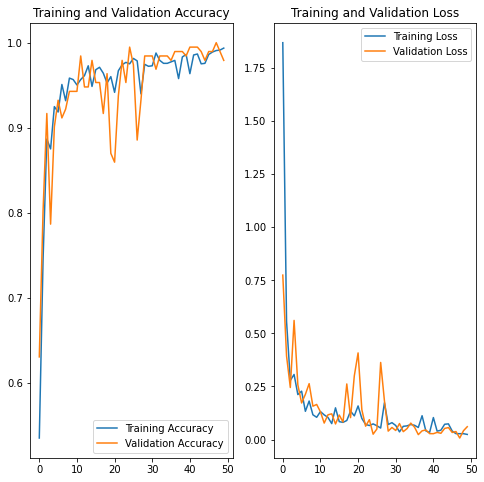

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),accuracy,label='Training Accuracy')
plt.plot(range(EPOCHS),val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#  PREDICTING FOR ONE IMAGE

first image to predict
first image's actual label: Potato___Late_blight
1/1 [==============================] - 1s 557ms/step
Predicted: Potato___Late_blight


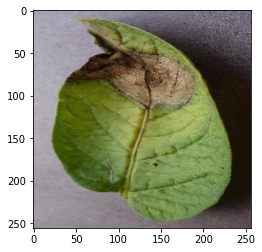

In [33]:
for image_batch, label_batch in test_data.take(1):
    
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction=model.predict(image_batch)
    print("Predicted:",class_names[np.argmax(batch_prediction[0])])
    

# PREDICTING FOR EACH TEST SAMPLE

In [34]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)#create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class= class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 30ms/step


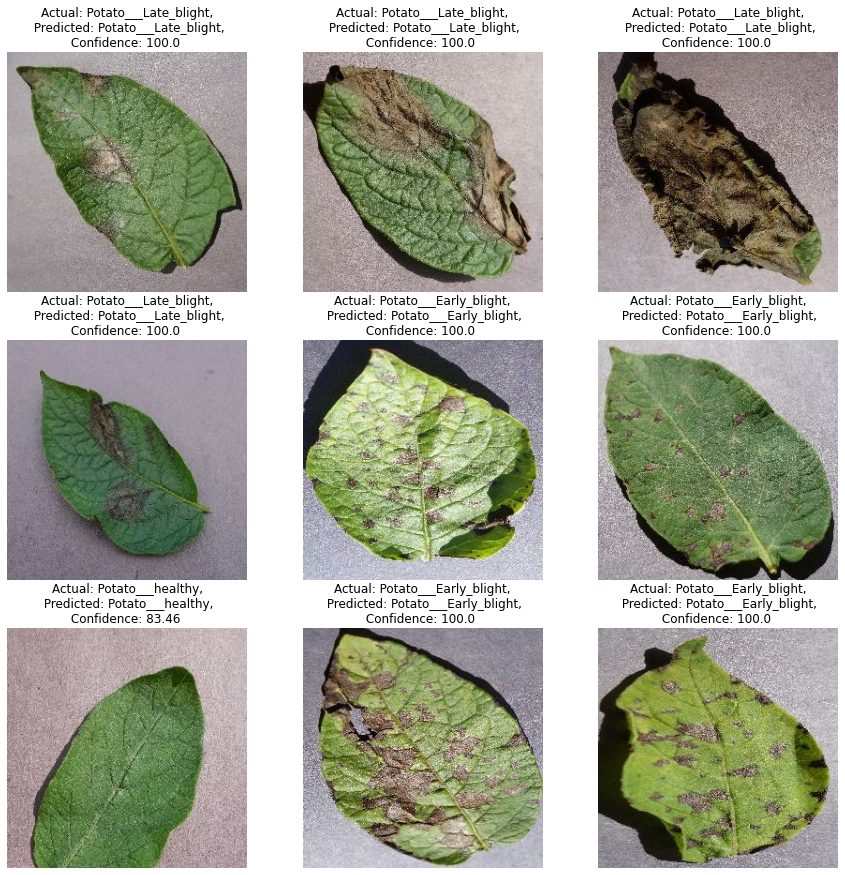

In [40]:
plt.figure(figsize=(15,15))

 
    for images, labels in test_data.take(1):
        for i in range(9):
            ax=plt.subplot(3,3,i+1)
            plt.imshow(images[i].numpy().astype("uint8"))

            predicted_class, confidence=predict(model,images[i].numpy())
            actual_class = class_names[labels[i]]

            plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}  ")

            plt.axis("off")

In [36]:
#model_version=1
#model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
